<a href="https://colab.research.google.com/github/max6811/inmersion_datos_alura/blob/main/RetoDia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

#montamos nuestro contenido de drive
drive.mount('/content/drive')

import pandas as pd
#asigamos el contenido de nuestro archivo que contine el set de datos
inmuebles = pd.read_csv('/content/drive/MyDrive/COURSES/imercion_de_datos_alura/inmuebles_bogota.csv')

#renombramos las columnas 
columnas = {'Baños': 'Banos', 'Área': 'Area'}
inmuebles = inmuebles.rename(columns=columnas)

#expand=True => nos devuelve un dataFrame, ya no un panda series
valor = inmuebles.Valor.str.split(expand=True)

inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles['Precio'] = inmuebles.Precio.str.replace('.', '', regex=True)
inmuebles['Precio_millon'] = inmuebles.Precio.astype('float') / 1000000

# Funcion Lamda para ajustar los decimales
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

Mounted at /content/drive


,Habitaciones,Banos,Area,Precio_millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


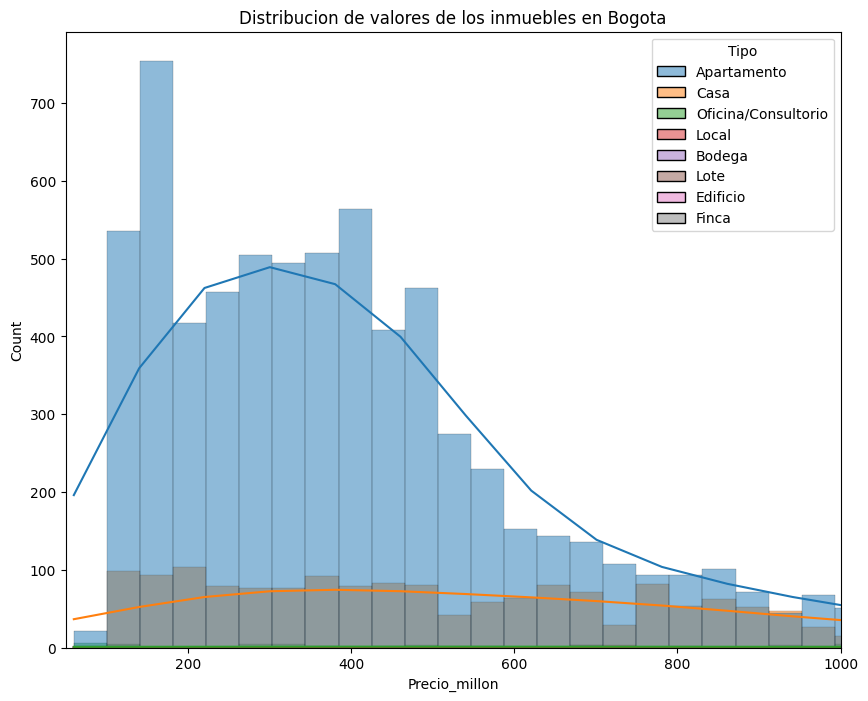

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# creamos nuestro lienzo
plt.figure(figsize=(10, 8))

#realizamos el grafico de nuestro histograma
grafica = sns.histplot(data=inmuebles, x='Precio_millon', kde=True, hue='Tipo')
grafica.set_title('Distribucion de valores de los inmuebles en Bogota')

# ponenmos el limite para una mejor visualizacion 
plt.xlim((50, 1000))
# plt.ylim((0, 20))
# gradar e importar en algun formato y donde lo queremos exportar
# plt.savefig('/content/drive/MyDrive/COURSES/imercion_de_datos_alura/valor_inmueble.png', format='png')
plt.show()

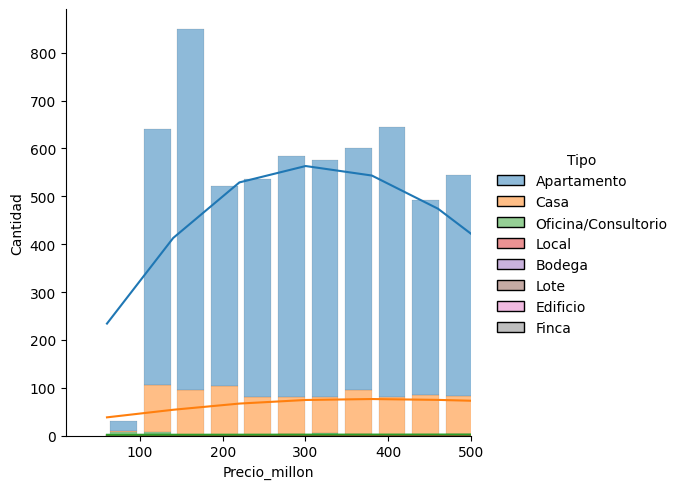

In [18]:
# dots = sns.displot("hist")
sns.displot(
    data=inmuebles, x='Precio_millon', kde=True, hue='Tipo', multiple='stack', shrink=.8
)
plt.xlim((10,500))
# plt.xlabel('max')
plt.ylabel('Cantidad')
# plt.colorbar
plt.show()

In [19]:
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_millon
6684,Apartamento,Apartamento en venta en Cedritos,3,2,75,Cedritos,Usaquén,$ 285.000.000,$,285000000,285.00
8507,Apartamento,Apartamento en venta en Usaquén,3,2,55,Usaquén,Usaquén,$ 160.000.000,$,160000000,160.00
5202,Apartamento,Apartamento en venta en El Chicó,3,3,193,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 980.000.000,$,980000000,980.00


# **Reto Numero 1 dia 2**

  - estudiar a mas profundidad el histograma 
  - seleccionar 3 tipos de inmuebles
  - refinar el grafico: titulos, labels, fuentes, colores, etiquetas, etc. 
  - poner una concluecion de la informacino: como esta el precio de los 

In [ ]:
#filtramos los tres tipos de inmuebles seleccionados para el analisis
tres_tipos = inmuebles.loc[(inmuebles['Tipo']=='Casa') | (inmuebles['Tipo']=='Apartamento') | (inmuebles['Tipo']=='Finca')]
plt.figure(figsize=(10, 8))

sns.histplot(data=tres_tipos, x='Precio_millon', hue='Tipo',kde=True, multiple='stack')
plt.title('Distribucion de Tres tipos de inmuebles en Bogota', color='red', fontsize=18)
plt.xlabel('Precio en millones', color='blue')
plt.ylabel('Cantidad', color='purple')
plt.xlim((100, 1500))
plt.ylim((0, 600))
plt.show()

# **Conclusion**
Entre los tres tipos de inmuebles seleccionados se puede apreciar lo siguiente:
 - existe una gran cantidad de Apartamentos en tre un rando de precios de 100 y 700 millones
 - Vemos que no hay demasidas Fincas en oferta y las que existen tinen un precio entre 900 y 1100 millones
 - existen Cantidad de casas de todos los precios 

# **Reto numero 2 dia 2**

In [82]:
inmuebles['Precio_m2'] = inmuebles.Precio_millon / inmuebles.Area
inmuebles.drop(inmuebles.index[(inmuebles.Habitaciones == 110)], axis=0,inplace=True)

# sns.histplot(data=inmuebles, x='Precio_m2', y='Barrio',kde=True, multiple='stack')
# plt.title('Distribucion de Tres tipos de inmuebles en Bogota', color='red', fontsize=18)
# plt.xlabel('Precio por m2', color='blue')
# plt.ylabel('Barrio', color='purple')
# # plt.xlim((100, 1500))
# # plt.ylim((0, 600))
# plt.show()

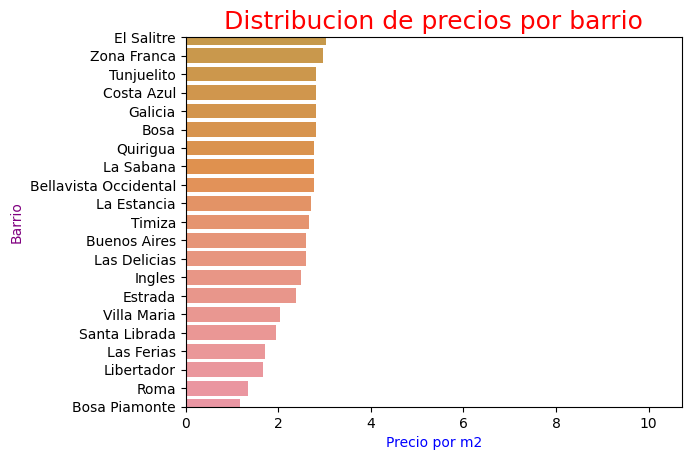

In [95]:
# eliminamos la fila con la cantidad de habitacones ilogica
barrios = inmuebles.groupby('Barrio')['Precio_m2'].mean().sort_values(ascending=True)
barrios

sns.barplot(x=barrios.values, y=barrios.index)
plt.title('Distribucion de precios por barrio', color='red', fontsize=18)
plt.xlabel('Precio por m2', color='blue')
plt.ylabel('Barrio', color='purple')
plt.ylim((0, 20))
plt.show()